# CO2 Emission by Vehicles

## <b><font color='red'> Business Objective </font></b>
- ##### The fundamental goal here is to model the CO2 emissions as a function of several car engines features.

## <b><font color='red'> Data Set Details </font></b>
 
#### The file contains the data for this example. Here the number of variables (columns) is 12, and the number of instances (rows) is 7385. In that way, this problem has the 12 following variables:
- ##### make, car brand under study. 
- ##### model, the specific model of the car. 
- ##### vehicle_class, car body type of the car. 
- ##### engine_size, size of the car engine, in Litres. 
- ##### cylinders, number of cylinders. 
- ##### transmission, "A" for 'Automatic', "AM" for 'Automated manual', "AS" for 'Automatic with select shift', "AV" for 'Continuously variable', "M" for 'Manual'. 
- ##### fuel_type, "X" for 'Regular gasoline', "Z" for 'Premium gasoline', "D" for 'Diesel', "E" for 'Ethanol (E85)', "N" for 'Natural gas'. 
- ##### fuel_consumption_city, City fuel consumption ratings, in litres per 100 kilometres. 
- ##### fuel_consumption_hwy, Highway fuel consumption ratings, in litres per 100 kilometres. 
- ##### fuel_consumption_comb(l/100km), the combined fuel consumption rating (55% city, 45% highway), in L/100 km. 
- ##### fuel_consumption_comb(mpg), the combined fuel consumption rating (55% city, 45% highway), in miles per gallon (mpg). 
- ##### co2_emissions, the tailpipe emissions of carbon dioxide for combined city and highway driving, in grams per kilometer. 


### <font color='green'> Importing some important libraries </font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## <font color='green'> EDA (Exploratory Data Analysis)</font>

In [2]:
# storing the data into a variable
df = pd.read_csv('co2 Emissions.csv')

In [3]:
#check first 10 records
df.head(10)

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [4]:
#check last 10 records
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS8,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS8,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS8,Z,12.2,8.7,10.7,26,248


In [5]:
#checking the null values
df.isnull().sum()

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

##### We can say there is no null values is present in out data set.

In [6]:
# collecting the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [7]:
#checking the shape of the data set
df.shape

(7385, 12)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
Fuel Consumption Hwy (L/100 km),7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
Fuel Consumption Comb (L/100 km),7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
Fuel Consumption Comb (mpg),7385.0,27.481652,7.231879,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


In [9]:
# checking duplicate values
df.duplicated().sum()

1103

In [10]:
# droping all the duplicate values
df.drop_duplicates(inplace=True)

In [11]:
len(df)

6282

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6282.0,3.161812,1.365201,0.9,2.0,3.0,3.7,8.4
Cylinders,6282.0,5.618911,1.846250,3.0,4.0,6.0,6.0,16.0
Fuel Consumption City (L/100 km),6282.0,12.610220,3.553066,4.2,10.1,12.1,14.7,30.6
Fuel Consumption Hwy (L/100 km),6282.0,9.070583,2.278884,4.0,7.5,8.7,10.3,20.6
Fuel Consumption Comb (L/100 km),6282.0,11.017876,2.946876,4.1,8.9,10.6,12.7,26.1
Fuel Consumption Comb (mpg),6282.0,27.411016,7.245318,11.0,22.0,27.0,32.0,69.0
CO2 Emissions(g/km),6282.0,251.157752,59.290426,96.0,208.0,246.0,289.0,522.0


In [13]:
df.reset_index(drop=True, inplace=True)

In [14]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## <font color='red'>Visualization</font>

### <font color='green'> Brands of Cars </font>

In [15]:
print("We have total",len(df['Make'].unique()),"Car Companies Data")
df_brand = df['Make'].value_counts().reset_index().rename(columns={'count':'Count'})
df_brand.head(20)

We have total 42 Car Companies Data


,Make,Count
0,FORD,577
1,CHEVROLET,515
2,BMW,501
3,MERCEDES-BENZ,365
4,PORSCHE,296
5,GMC,289
6,TOYOTA,276
7,AUDI,263
8,NISSAN,213
9,MINI,200


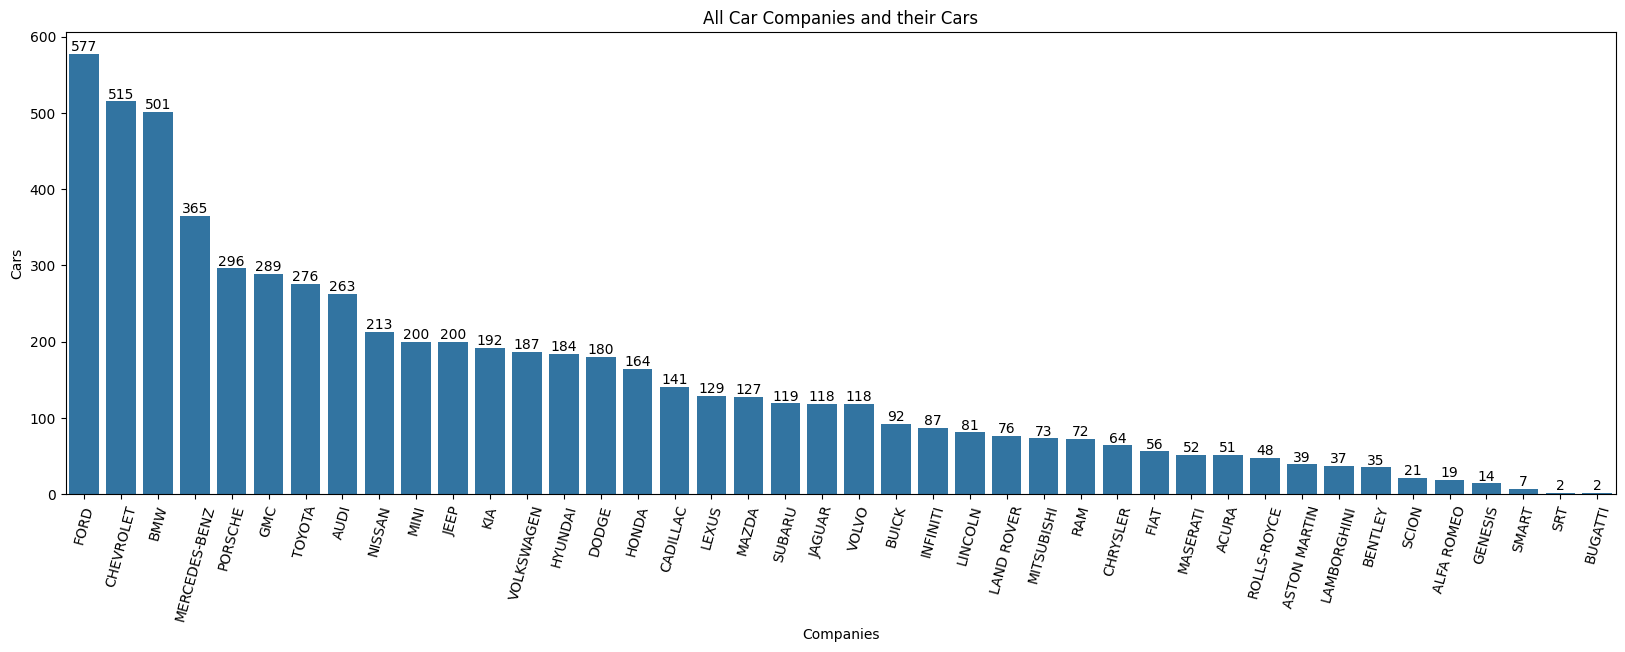

In [16]:
plt.figure(figsize=(20,6))
figure1 = sns.barplot(data = df_brand, x = "Make",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Car Companies and their Cars")
plt.xlabel("Companies")
plt.ylabel("Cars")
plt.bar_label(figure1.containers[0])
plt.show()

### <font color=green> Models of cars </font>

In [17]:
print("We have total",len(df['Model'].unique()),"Car Models")
df_model = df['Model'].value_counts().reset_index().rename(columns={'count':'Count'})[:25]
df_model.head(20)

We have total 2053 Car Models


,Model,Count
0,F-150 FFV,32
1,F-150 FFV 4X4,31
2,MUSTANG,27
3,FOCUS FFV,24
4,F-150 4X4,20
5,F-150,19
6,SONIC 5,18
7,ATS,18
8,JETTA,18
9,COMPASS,18


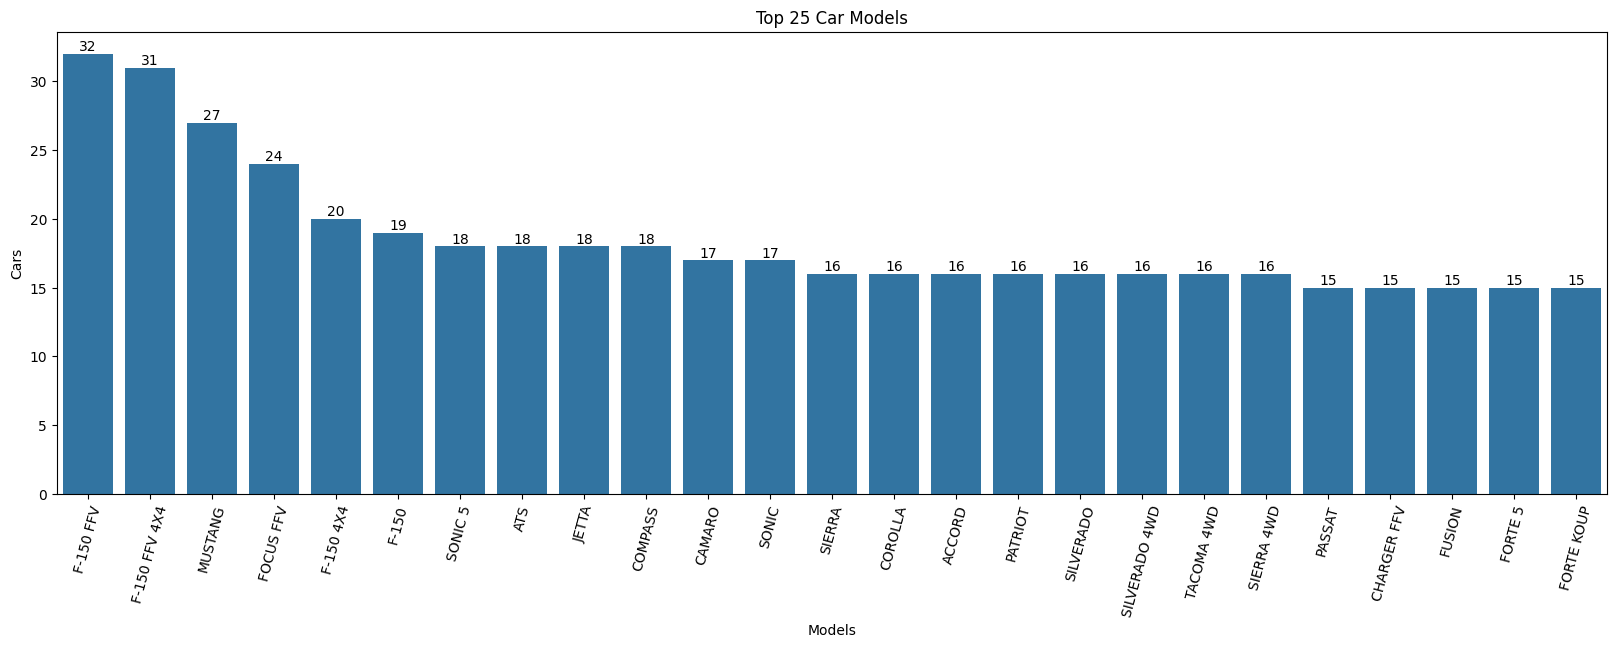

In [18]:
plt.figure(figsize=(20,6))
figure2 = sns.barplot(data = df_model, x = "Model",  y= "Count")
plt.xticks(rotation = 75)
plt.title("Top 25 Car Models")
plt.xlabel("Models")
plt.ylabel("Cars")
plt.bar_label(figure2.containers[0])
plt.show()

### <font color=green> Vehicle Class </font>

In [19]:
print("We have total",len(df['Vehicle Class'].unique()),"Vehicle Class")
df_vehicle_class = df['Vehicle Class'].value_counts().reset_index().rename(columns={'count':'Count'})
df_vehicle_class

We have total 16 Vehicle Class


,Vehicle Class,Count
0,SUV - SMALL,1006
1,MID-SIZE,983
2,COMPACT,903
3,SUV - STANDARD,613
4,SUBCOMPACT,533
5,FULL-SIZE,508
6,PICKUP TRUCK - STANDARD,475
7,TWO-SEATER,381
8,MINICOMPACT,274
9,STATION WAGON - SMALL,214


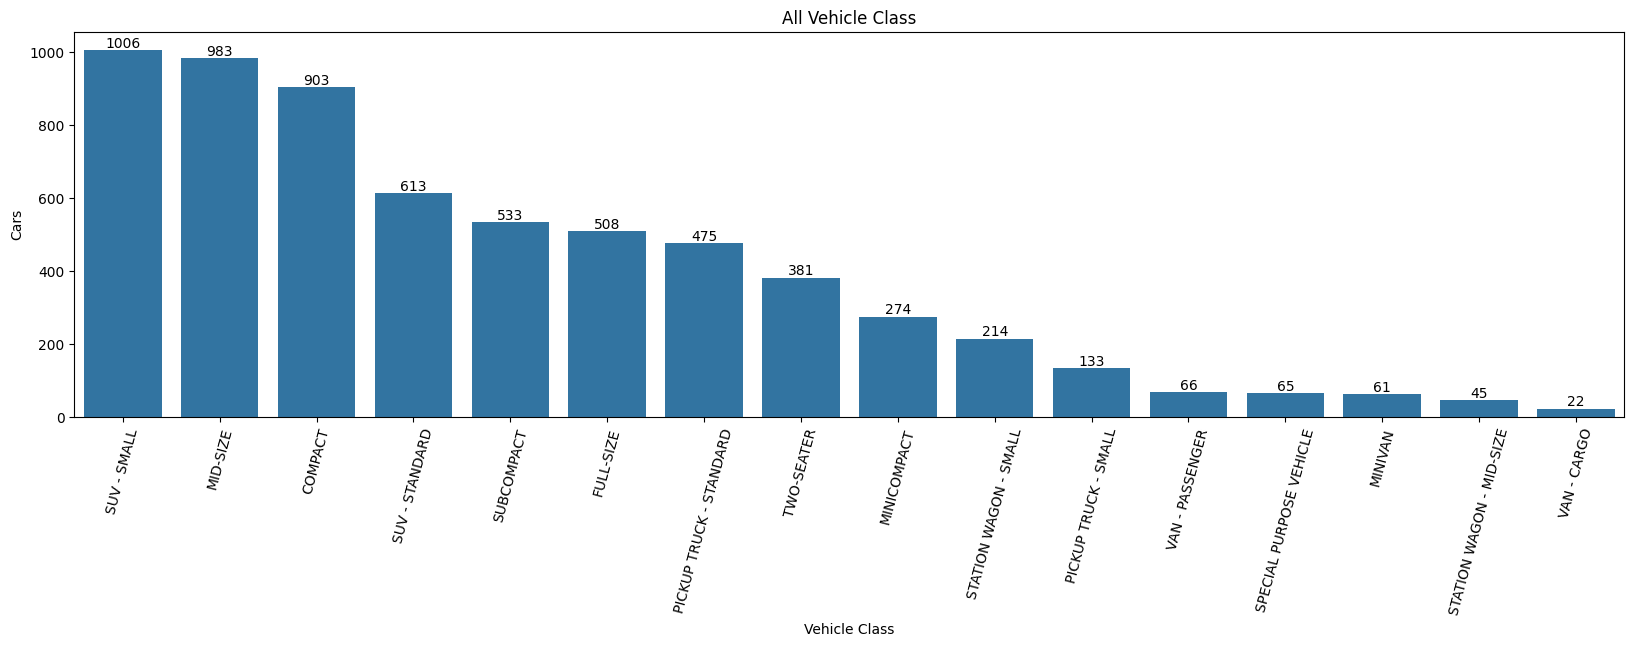

In [20]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = df_vehicle_class, x = "Vehicle Class",  y= "Count")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()

### <font color='green'> Engine Sizes of cars</font>

In [21]:
print("We have total",len(df['Engine Size(L)'].unique()),"Types of Engine Size")
df_engine_size = df['Engine Size(L)'].value_counts().reset_index().rename(columns={'count':'Count'})
df_engine_size.head(20)

We have total 51 Types of Engine Size


,Engine Size(L),Count
0,2.0,1260
1,3.0,687
2,3.6,433
3,3.5,431
4,2.5,355
5,2.4,287
6,1.6,272
7,5.3,240
8,1.8,191
9,5.0,179


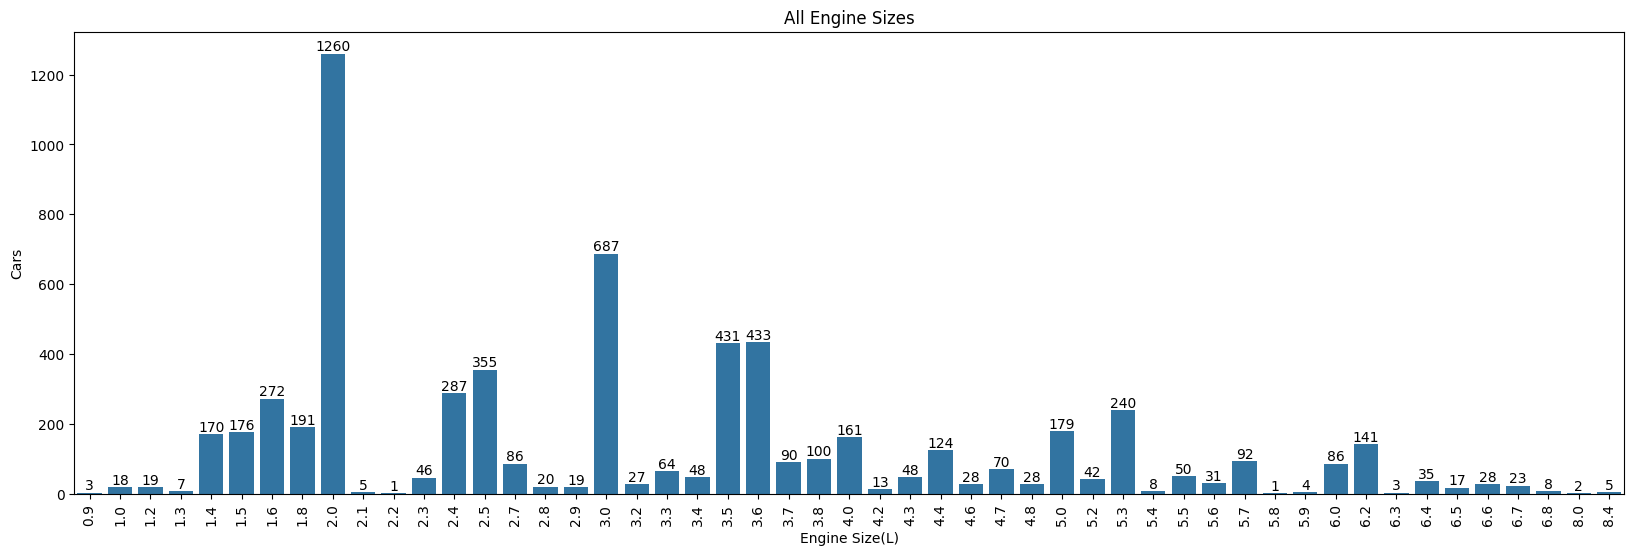

In [22]:
plt.figure(figsize=(20,6))
figure4 = sns.barplot(data = df_engine_size, x = "Engine Size(L)",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Engine Sizes")
plt.xlabel("Engine Size(L)")
plt.ylabel("Cars")
plt.bar_label(figure4.containers[0])
plt.show()

### <font color='green'> Cylinders </font>

In [23]:
print("We have total",len(df['Cylinders'].unique()),"Types of Cylinders")
df_cylinders = df['Cylinders'].value_counts().reset_index().rename(columns={'count':'Count'})
df_cylinders.head(20)

We have total 8 Types of Cylinders


,Cylinders,Count
0,4,2749
1,6,2040
2,8,1202
3,12,135
4,3,88
5,10,40
6,5,26
7,16,2


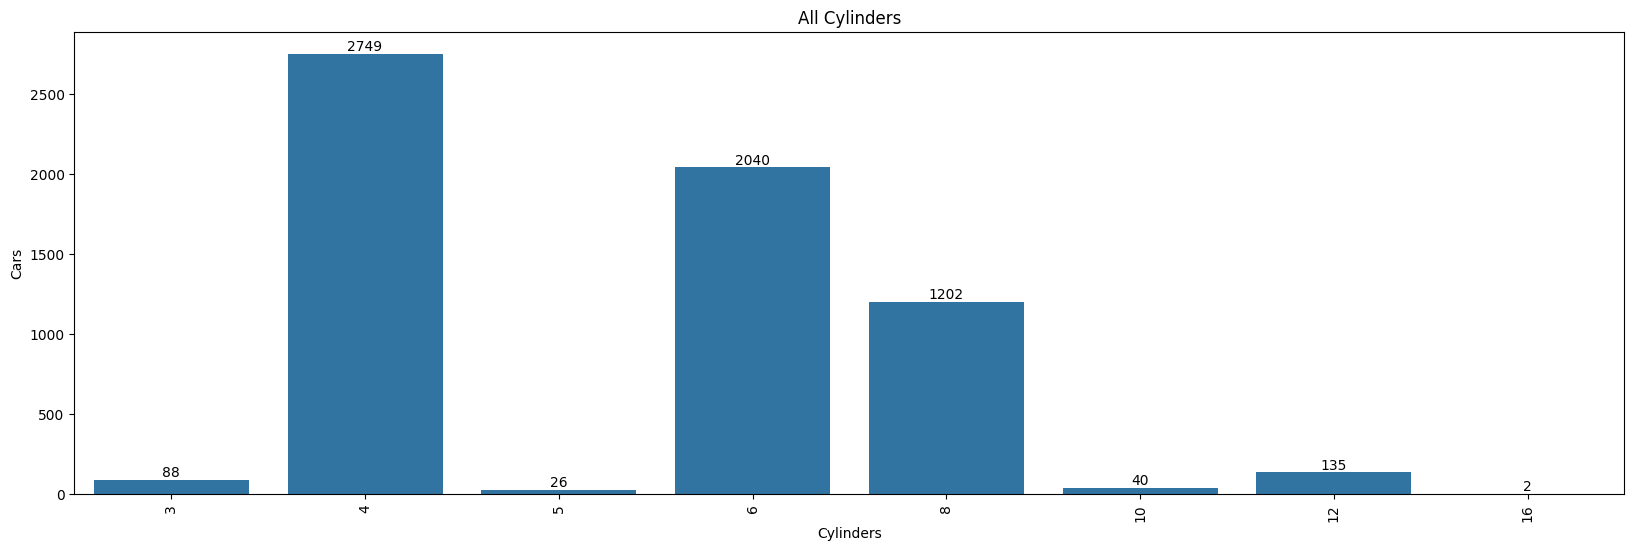

In [24]:
plt.figure(figsize=(20,6))
figure5 = sns.barplot(data = df_cylinders, x = "Cylinders",  y= "Count")
plt.xticks(rotation = 90)
plt.title("All Cylinders")
plt.xlabel("Cylinders")
plt.ylabel("Cars")
plt.bar_label(figure5.containers[0])
plt.show()

### <font color='green'> Transmission of Cars </font>

In [25]:
df['Transmission'].unique()

array(['AS5', 'M6', 'AV7', 'AS6', 'AM6', 'A6', 'AM7', 'AV8', 'AS8', 'A7',
       'A8', 'M7', 'A4', 'M5', 'AV', 'A5', 'AS7', 'A9', 'AS9', 'AV6',
       'AS4', 'AM5', 'AM8', 'AM9', 'AS10', 'A10', 'AV10'], dtype=object)

#### Here we have to map similar labels into a single label for our Transmission column.

In [26]:
df["Transmission"] = np.where(df["Transmission"].isin(["A4", "A5", "A6", "A7", "A8", "A9", "A10"]), "Automatic", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AM5", "AM6", "AM7", "AM8", "AM9"]), "Automated Manual", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AS4", "AS5", "AS6", "AS7", "AS8", "AS9", "AS10"]), "Automatic with Select Shift", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["AV", "AV6", "AV7", "AV8", "AV10"]), "Continuously Variable", df["Transmission"])
df["Transmission"] = np.where(df["Transmission"].isin(["M5", "M6", "M7"]), "Manual", df["Transmission"])

In [27]:
print("We have total",len(df['Transmission'].unique()),"Transmissions")
df_transmission = df['Transmission'].value_counts().reset_index().rename(columns={'count':'Count'})
df_transmission

We have total 5 Transmissions


,Transmission,Count
0,Automatic with Select Shift,2722
1,Automatic,1536
2,Manual,1019
3,Automated Manual,540
4,Continuously Variable,465


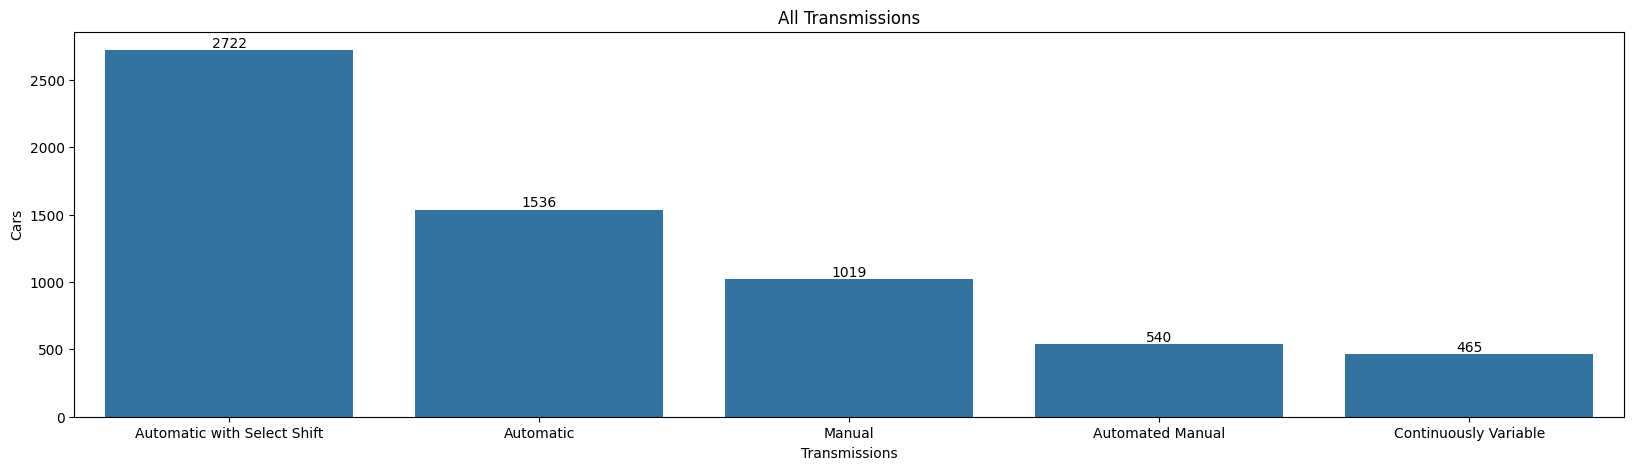

In [28]:
plt.figure(figsize=(20,5))
figure6 = sns.barplot(data = df_transmission, x = "Transmission",  y= "Count")
plt.title("All Transmissions")
plt.xlabel("Transmissions")
plt.ylabel("Cars")
plt.bar_label(figure6.containers[0])
plt.show()

### <font color='green'> Fuel Type of Cars </font>

In [29]:
df['Fuel Type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

#### Here we have to map similar labels into a single label for our Fuel Type column.

In [30]:
df["Fuel Type"] = np.where(df["Fuel Type"]=="Z", "Premium Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="X", "Regular Gasoline", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="D", "Diesel", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="E", "Ethanol(E85)", df["Fuel Type"])
df["Fuel Type"] = np.where(df["Fuel Type"]=="N", "Natural Gas", df["Fuel Type"])

In [31]:
print("We have total",len(df['Fuel Type'].unique()),"Fuel Types")
df_fuel_type = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_fuel_type

We have total 5 Fuel Types


,Fuel Type,Count
0,Regular Gasoline,3039
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147
4,Natural Gas,1


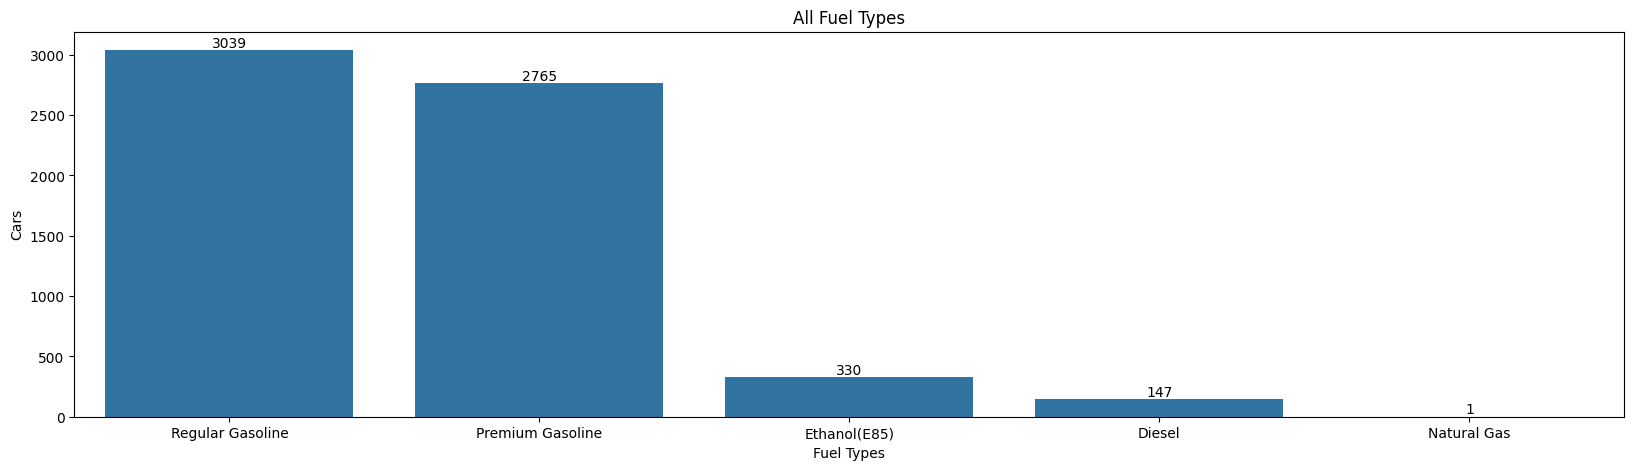

In [32]:
plt.figure(figsize=(20,5))
figure7 = sns.barplot(data = df_fuel_type, x = "Fuel Type",  y= "Count")
plt.title("All Fuel Types")
plt.xlabel("Fuel Types")
plt.ylabel("Cars")
plt.bar_label(figure7.containers[0])
plt.show()

### <font color='green'> Distplot </font>

<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Density'>

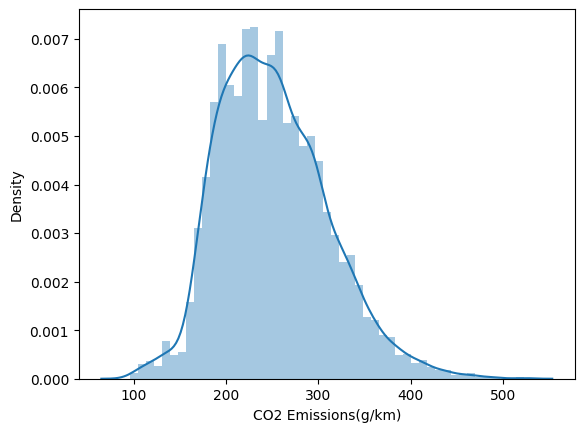

In [33]:
sns.distplot(df['CO2 Emissions(g/km)'])

<Axes: xlabel='Cylinders', ylabel='Density'>

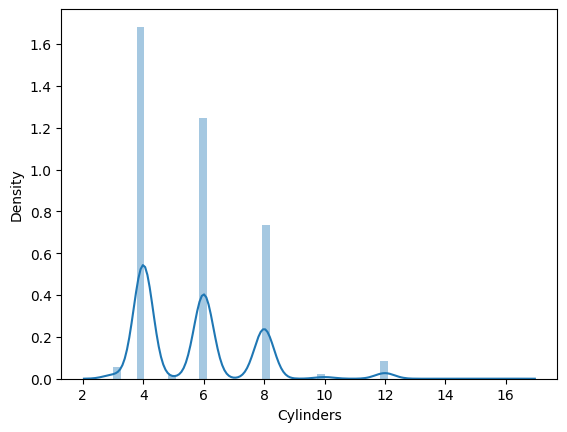

In [34]:
sns.distplot(df['Cylinders'])

<Axes: xlabel='Engine Size(L)', ylabel='Density'>

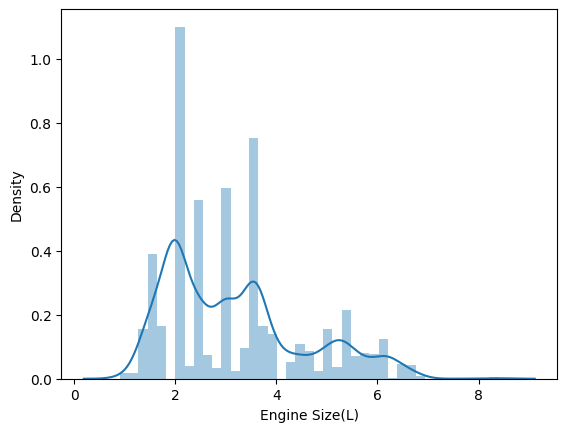

In [35]:
sns.distplot(df['Engine Size(L)'])

<Axes: xlabel='Fuel Consumption Comb (L/100 km)', ylabel='Density'>

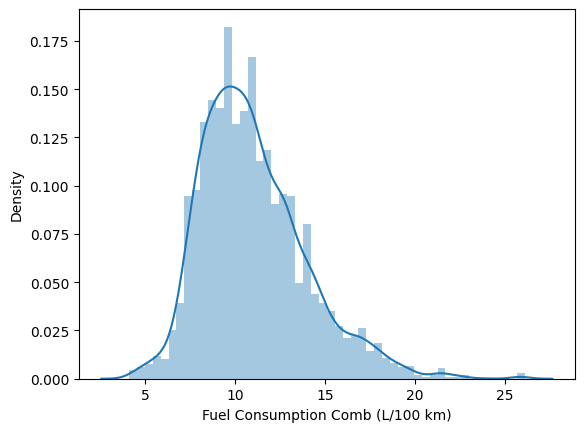

In [36]:
sns.distplot(df['Fuel Consumption Comb (L/100 km)'])

## <font color='red'>Variation in CO2 emissions with different features.</font>

### <font color='green'> CO2 Emission with Brand </font>

In [37]:
df_co2_make = df.groupby(['Make'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

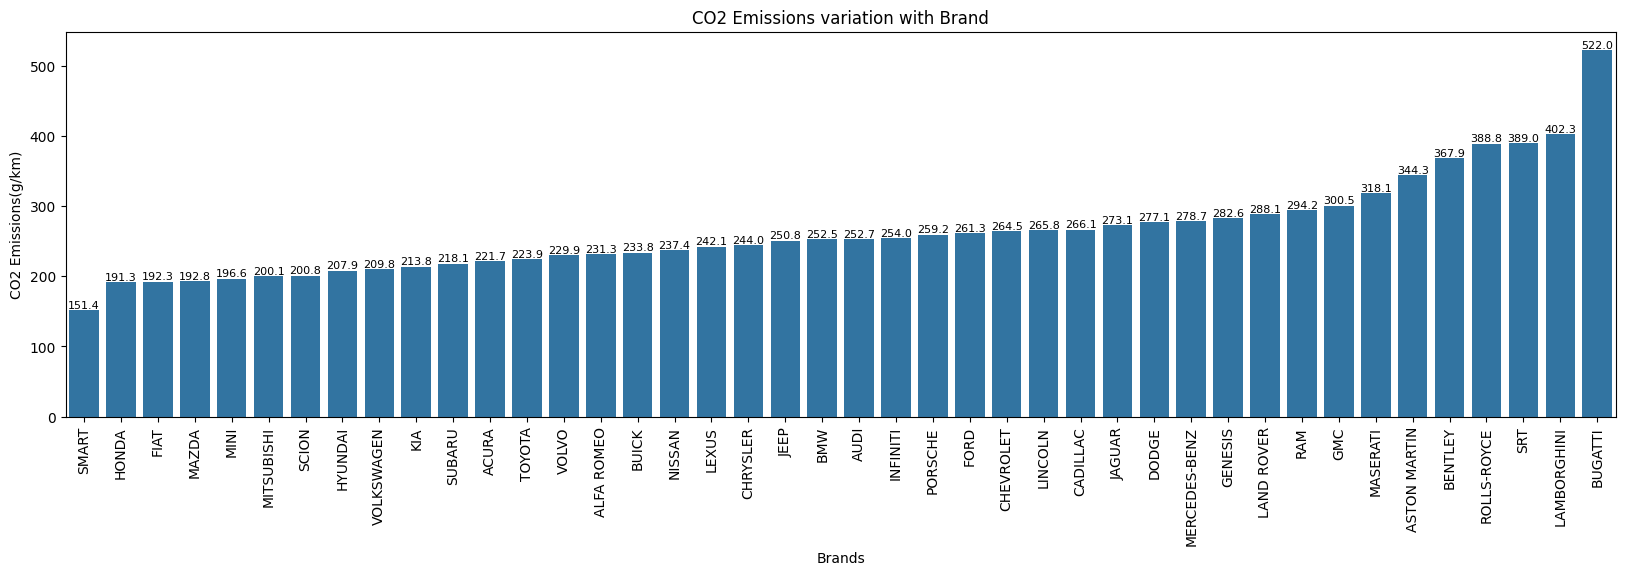

In [38]:
plt.figure(figsize=(20,5))
figure8 = sns.barplot(data = df_co2_make, x = "Make",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Brand")
plt.xlabel("Brands")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure8.containers[0], fontsize=8, fmt='%.1f')
plt.show()

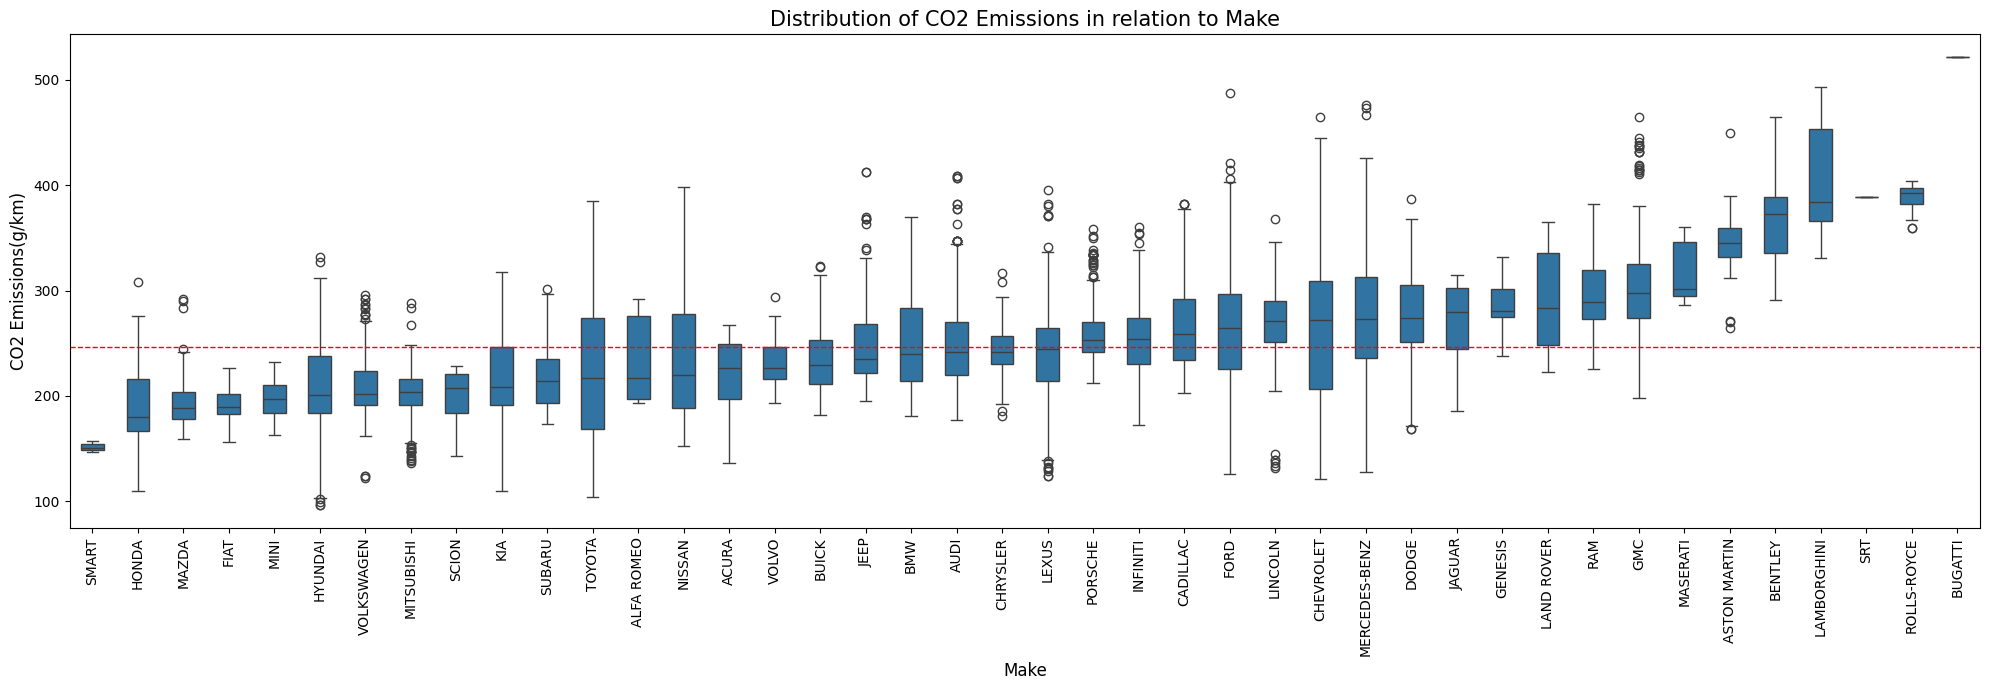

In [39]:
plt.figure(figsize=(20,7))
order = df.groupby("Make")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Make", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Make", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Vehicle Class </font>

In [40]:
df_co2_vehicle_class = df.groupby(['Vehicle Class'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

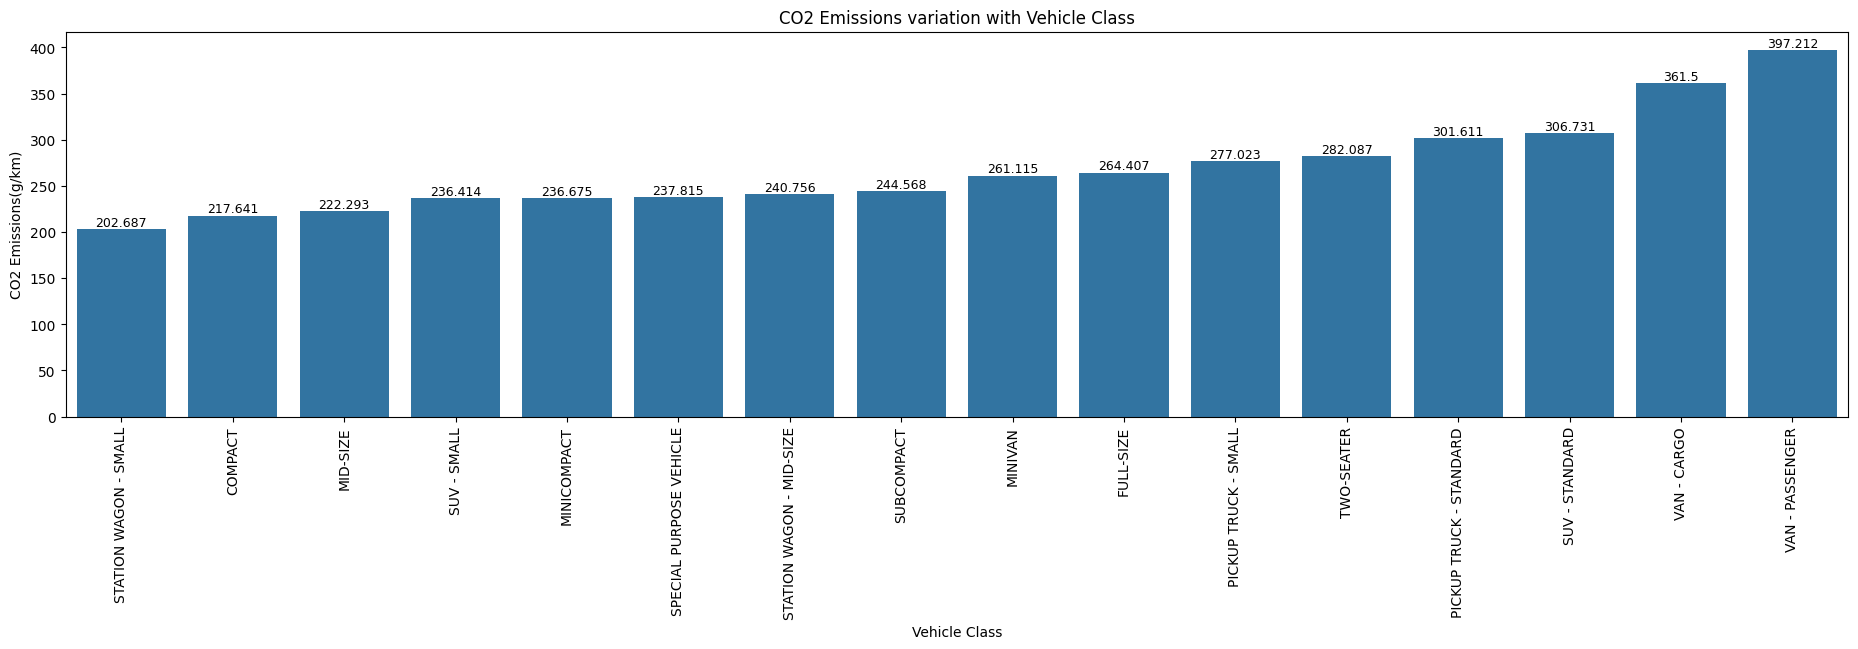

In [41]:
plt.figure(figsize=(23,5))
figure9 = sns.barplot(data = df_co2_vehicle_class, x = "Vehicle Class",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure9.containers[0], fontsize=9)
plt.show()

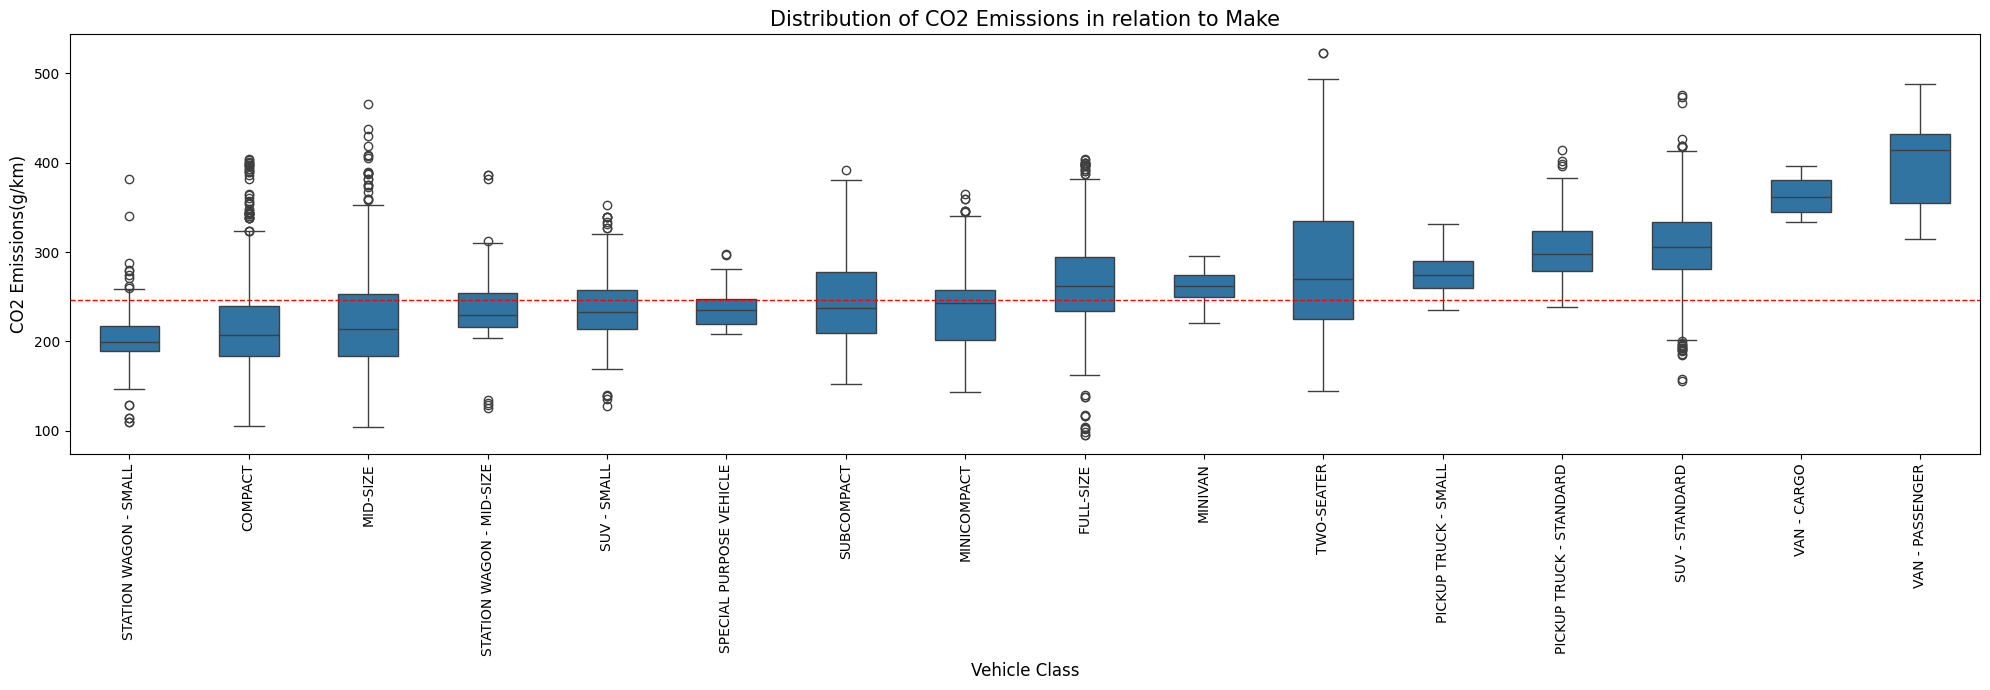

In [42]:
plt.figure(figsize=(20,7))
order = df.groupby("Vehicle Class")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Vehicle Class", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Vehicle Class", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Transmission </font>

In [43]:
df_co2_transmission = df.groupby(['Transmission'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

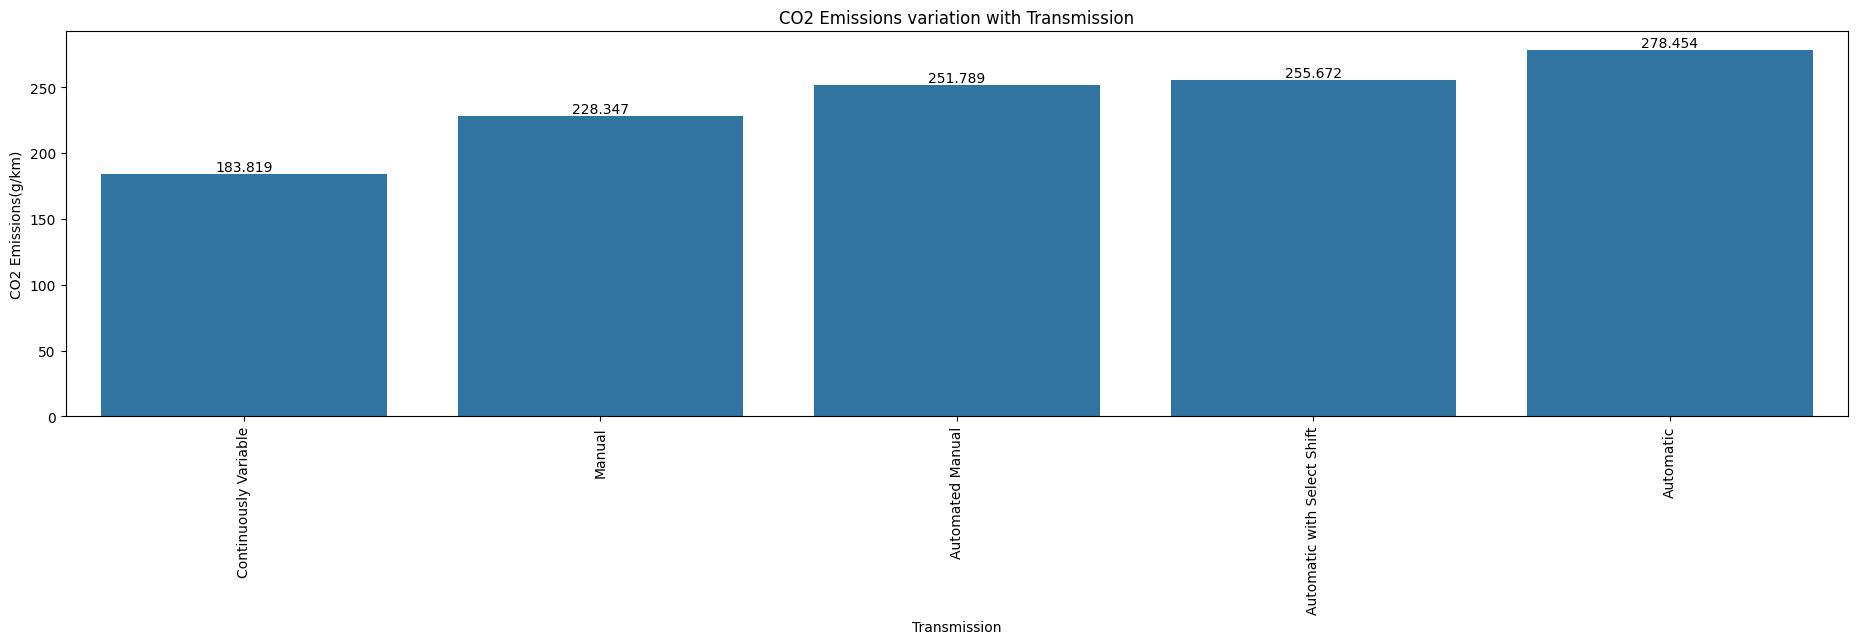

In [44]:
plt.figure(figsize=(23,5))
figure10 = sns.barplot(data = df_co2_transmission, x = "Transmission",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Transmission")
plt.xlabel("Transmission")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure10.containers[0], fontsize=10)
plt.show()

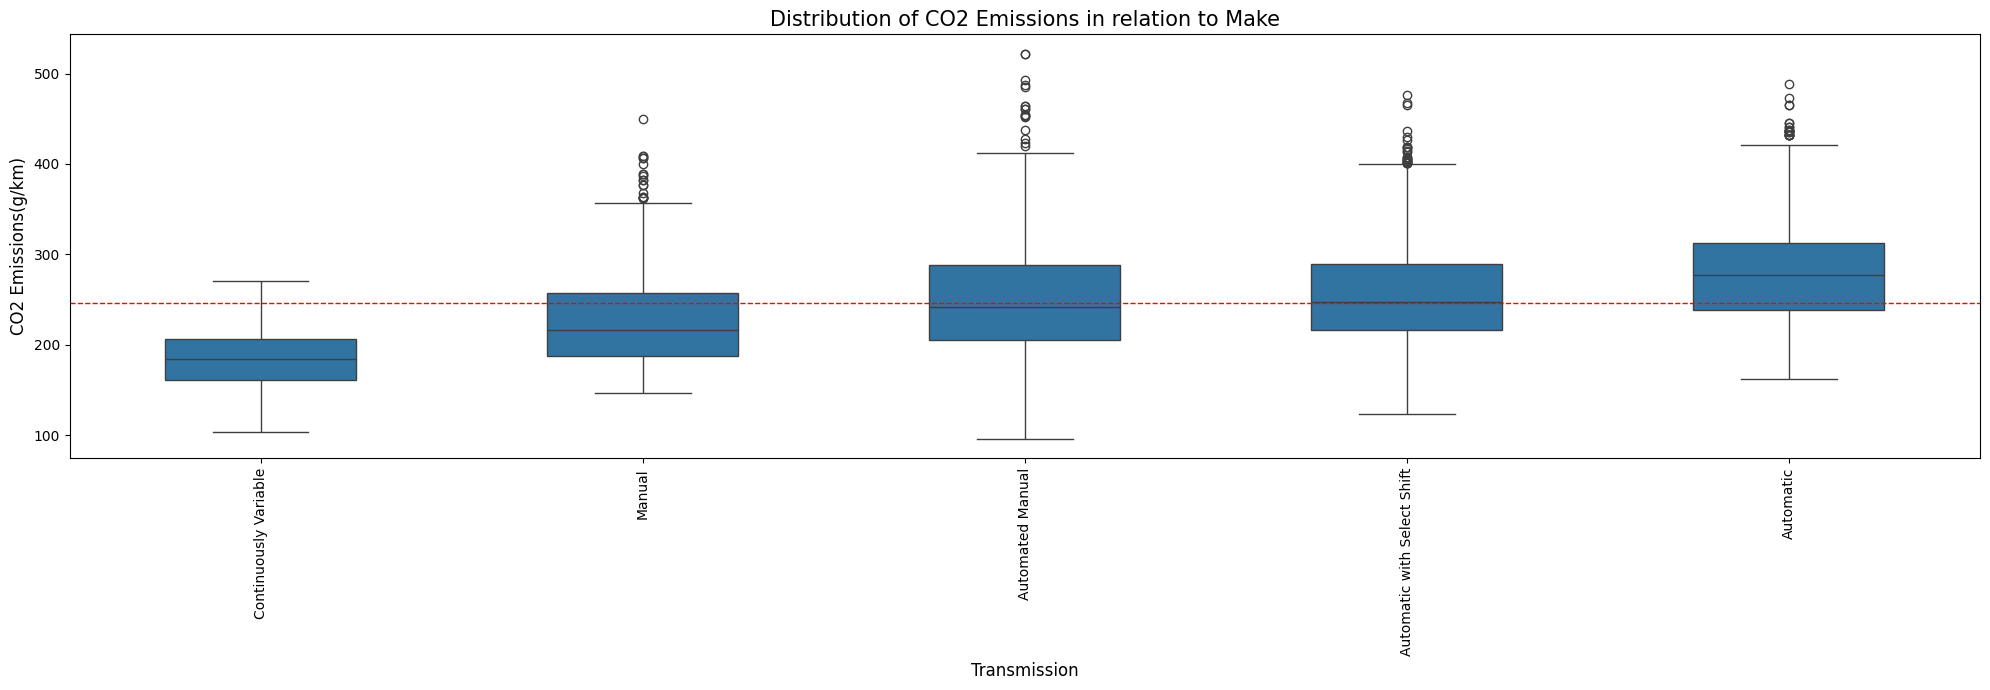

In [45]:
plt.figure(figsize=(20,7))
order = df.groupby("Transmission")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Transmission", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Transmission", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color='green'> CO2 Emissions variation with Fuel Type </font>

In [46]:
df_co2_fuel_type = df.groupby(['Fuel Type'])['CO2 Emissions(g/km)'].mean().sort_values().reset_index()

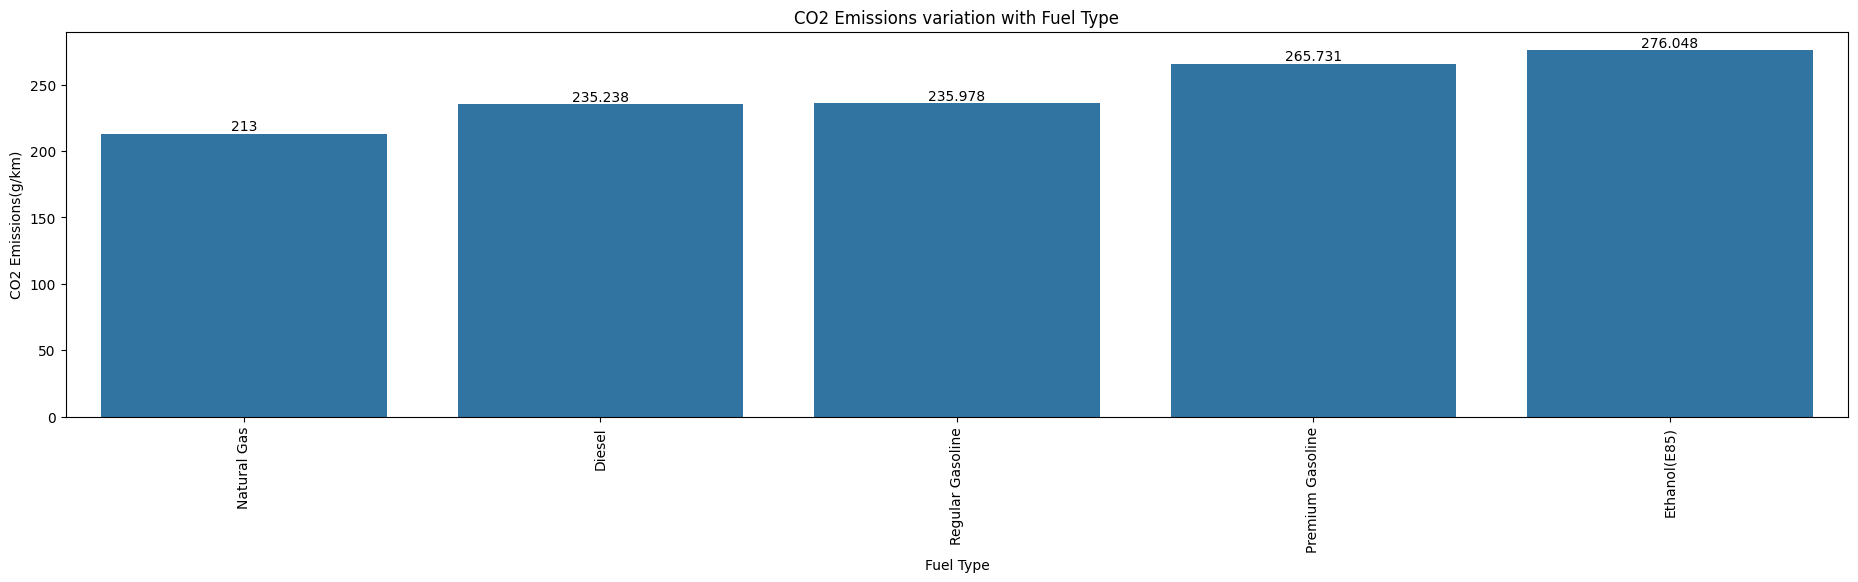

In [47]:
plt.figure(figsize=(23,5))
figure11 = sns.barplot(data = df_co2_fuel_type, x = "Fuel Type",  y= "CO2 Emissions(g/km)")
plt.xticks(rotation = 90)
plt.title("CO2 Emissions variation with Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions(g/km)")
plt.bar_label(figure11.containers[0], fontsize=10)
plt.show()

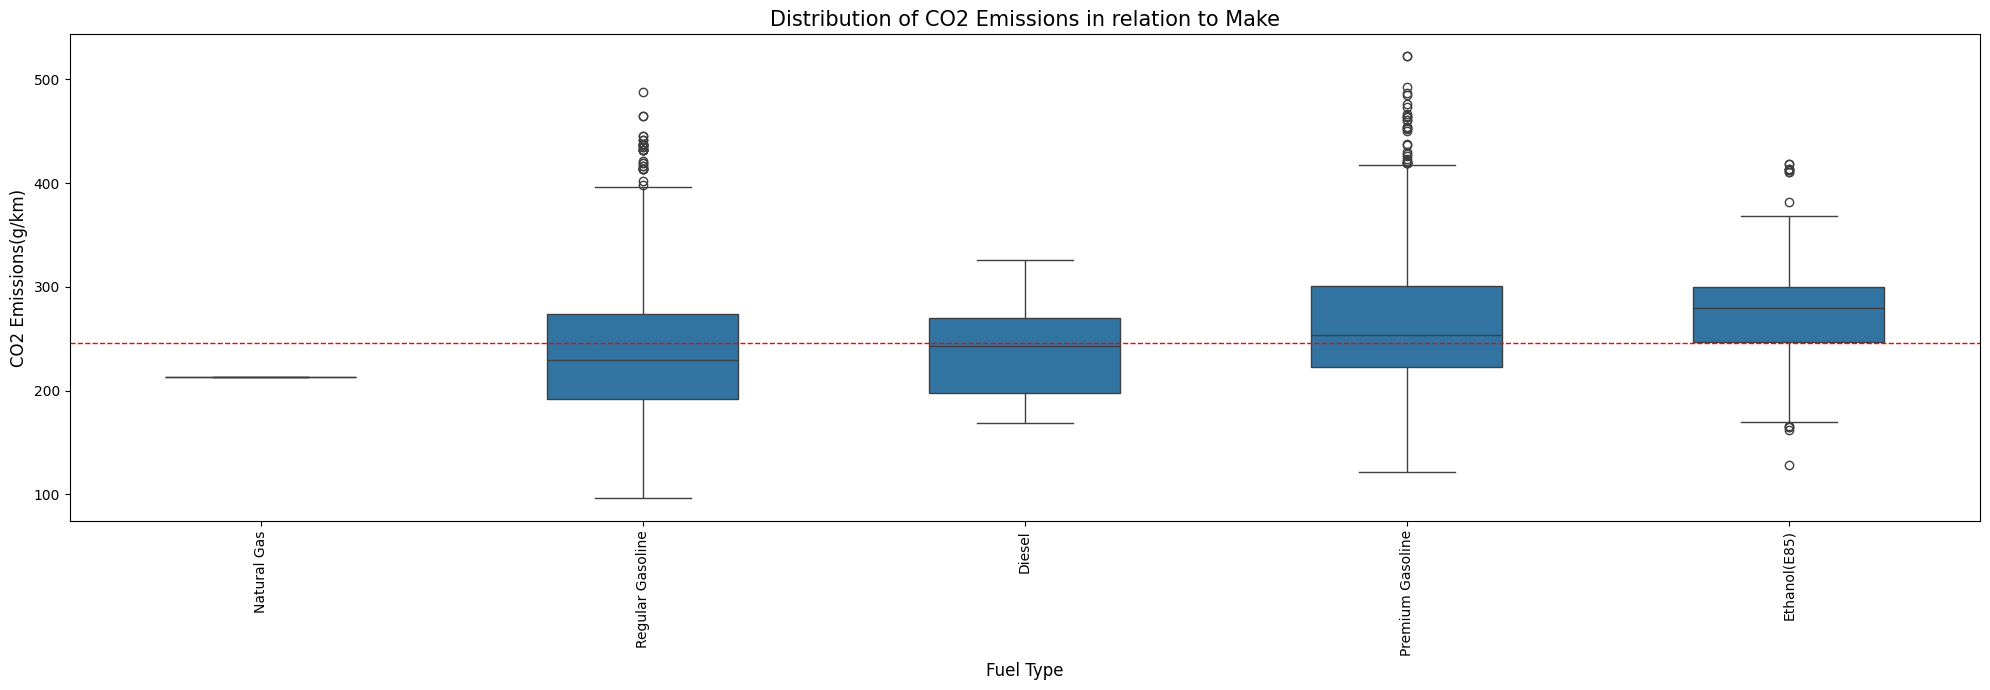

In [48]:
plt.figure(figsize=(20,7))
order = df.groupby("Fuel Type")["CO2 Emissions(g/km)"].median().sort_values(ascending=True).index
sns.boxplot(x="Fuel Type", y="CO2 Emissions(g/km)", data=df, order=order, width=0.5)
plt.title("Distribution of CO2 Emissions in relation to Make", fontsize=15)
plt.xticks(rotation=90, horizontalalignment='center')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("CO2 Emissions(g/km)", fontsize=12)
plt.axhline(df["CO2 Emissions(g/km)"].median(),color='r',linestyle='dashed',linewidth=1)
plt.tight_layout()
plt.show()

### <font color=red>Conclusion Of the EDA </font>
#### 1. There are total 42 types of car brand.
#### 2. There are total 2053 unique car model. These neither can be converted into any dummy variable nor it can be used for analysis. So we can drop this column.
#### 3. There are total 16 types of vehicle class basis on their gross vehicle weight rating (GVWR) and volume index. But there are no data available with exact GVWR or volume index value, so that we can categories the similar vehicle into a same group. 
#### 4. The 27 type of transmission has been clubbed into 5 different transmission without taking the number of clutches into account, as they does not affect CO2 emissions.
#### 5. The 5 type of Fuel Types has been renamed so that it has some meaningful interpretation.
#### 6. We have only one data on natural gas. So we cannot predict anything using only one data. That's why we have to drop this row.


## <font color='red'> DATA CLEANING </font>

### <font color=green> Correlation </font>

### We have to remove Natural Gass data from our data set. Because we can predict anything by only use one record.

In [49]:
df_natural=df[df["Fuel Type"]=="Natural Gas"]
natural=df_natural.index
df_natural

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
2232,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,Automatic with Select Shift,Natural Gas,15.2,9.5,12.7,22,213


In [50]:
# We have to remove Natural Gas from our data set
for i in natural:
    df.drop(i, axis = 0,inplace = True)

In [51]:
df.reset_index(drop=True, inplace=True)

In [52]:
df[df["Fuel Type"]=="Natural Gas"]


,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)


In [53]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [54]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,Fuel Type,Count
0,Regular Gasoline,3039
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147


In [55]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Automatic with Select Shift,Premium Gasoline,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,Manual,Premium Gasoline,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Continuously Variable,Premium Gasoline,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Automatic with Select Shift,Premium Gasoline,12.1,8.7,10.6,27,244


In [56]:
df.tail()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
6276,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,10.7,7.7,9.4,30,219
6277,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
6278,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Automatic with Select Shift,Premium Gasoline,11.7,8.6,10.3,27,240
6279,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,11.2,8.3,9.9,29,232
6280,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,Automatic with Select Shift,Premium Gasoline,12.2,8.7,10.7,26,248


### To check the correlation between our data we have to remove "Mode", "Make","Vehicle Class","Transmission","FuelType"

In [57]:
df.drop(['Make','Model','Vehicle Class','Fuel Consumption City (L/100 km)','Fuel Consumption Hwy (L/100 km)','Transmission','Fuel Consumption Comb (mpg)'],inplace=True,axis=1)

In [58]:
df_correlation = df[['Engine Size(L)','Cylinders','Fuel Consumption Comb (L/100 km)','CO2 Emissions(g/km)']]
df_correlation.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


In [59]:
df_check = df['Fuel Type'].value_counts().reset_index().rename(columns={'count':'Count'})
df_check

,Fuel Type,Count
0,Regular Gasoline,3039
1,Premium Gasoline,2765
2,Ethanol(E85),330
3,Diesel,147


In [60]:
df_correlation.corr().T

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
Engine Size(L),1.000000,0.928843,0.820145,0.854870
Cylinders,0.928843,1.000000,0.781104,0.834739
Fuel Consumption Comb (L/100 km),0.820145,0.781104,1.000000,0.916953
CO2 Emissions(g/km),0.854870,0.834739,0.916953,1.000000


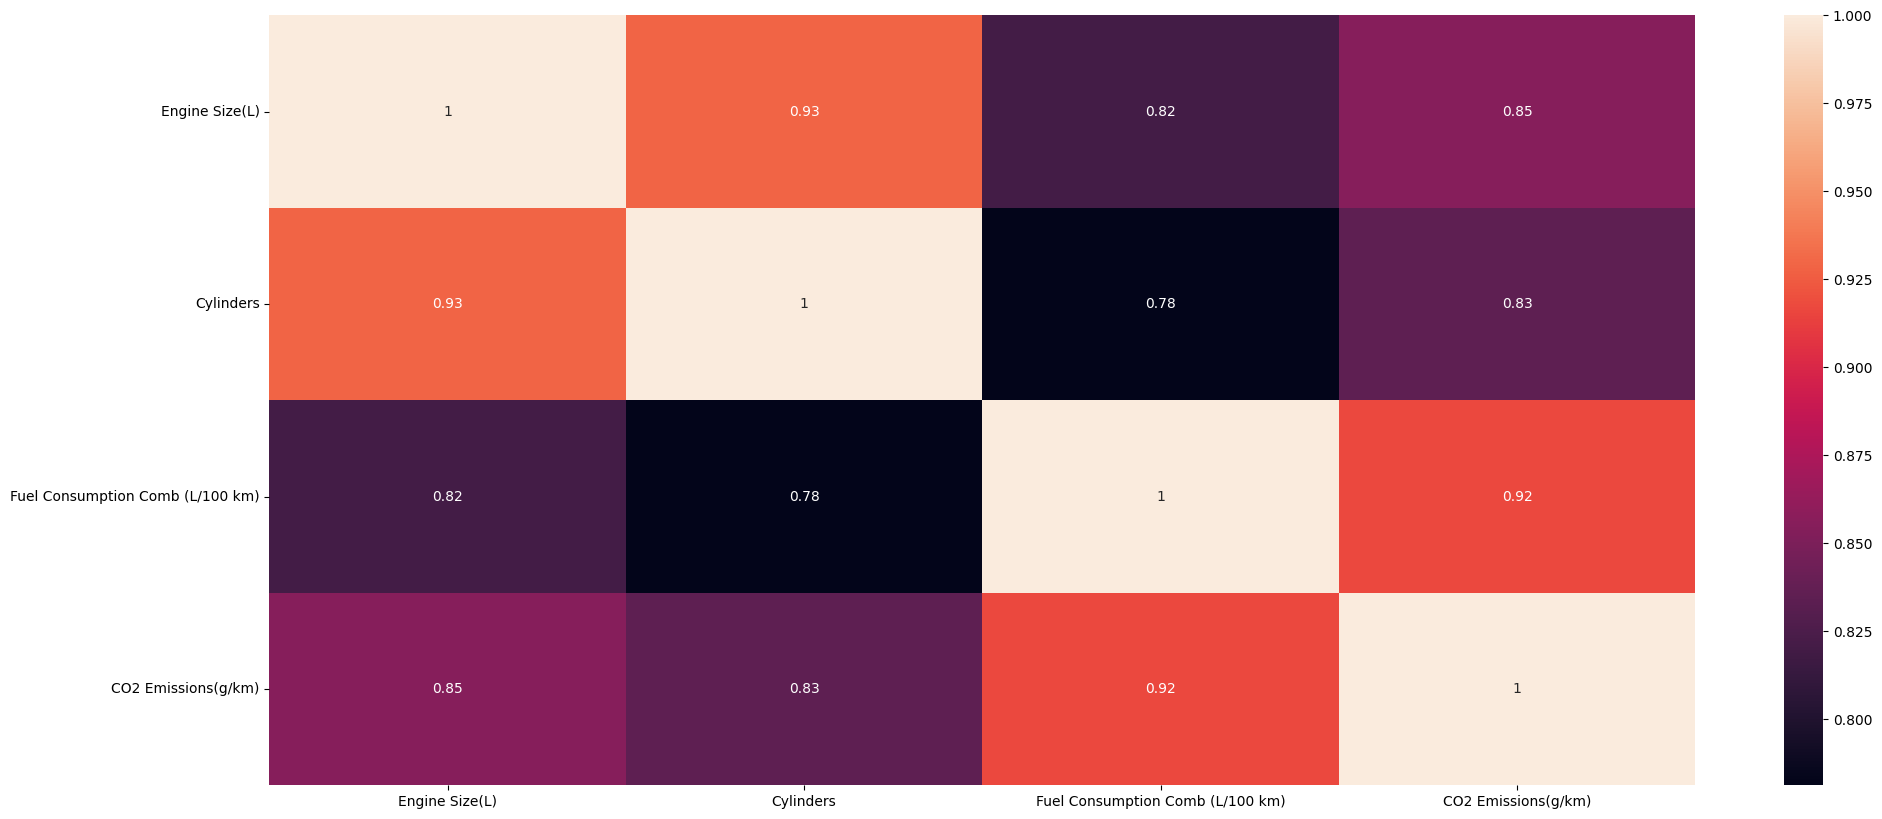

In [61]:
plt.figure(figsize = (23,10))
sns.heatmap(df_correlation.corr(), annot = True)
plt.show()

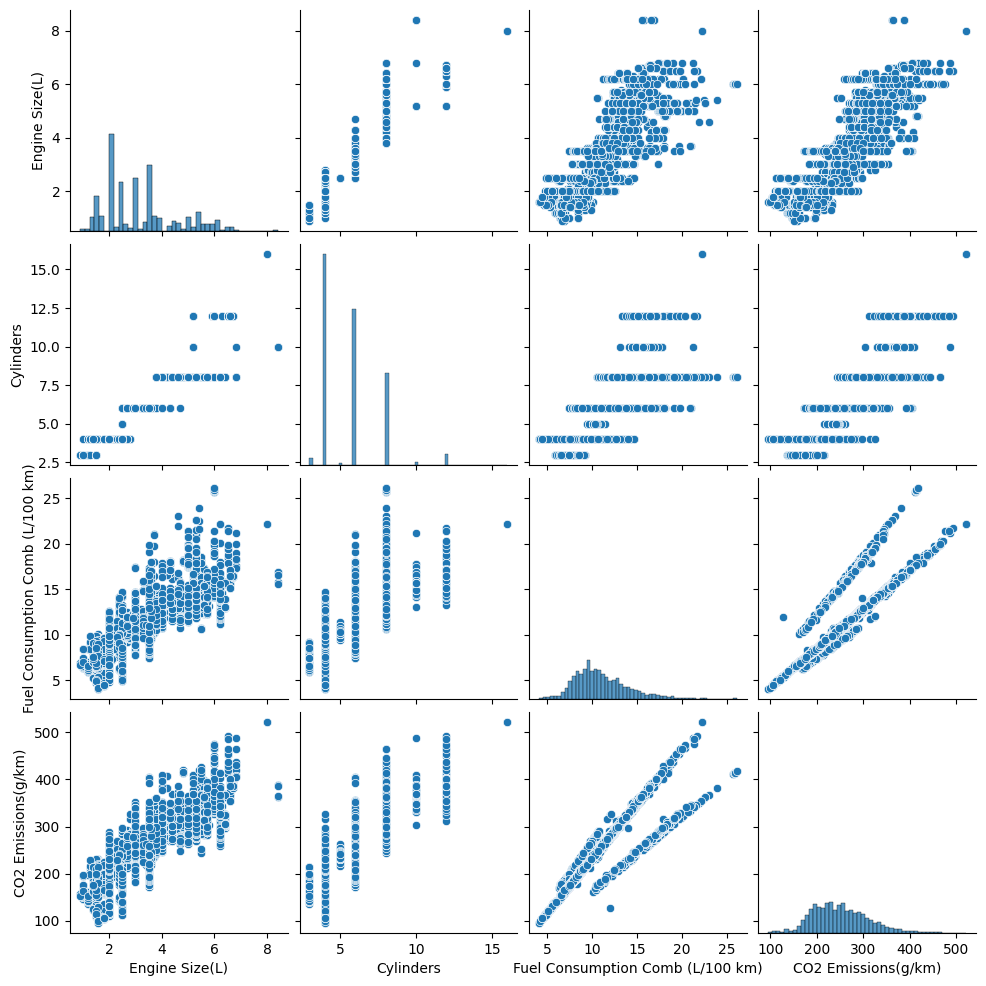

In [62]:
sns.pairplot(df_correlation)

### <font color='green'>Outliers</font>

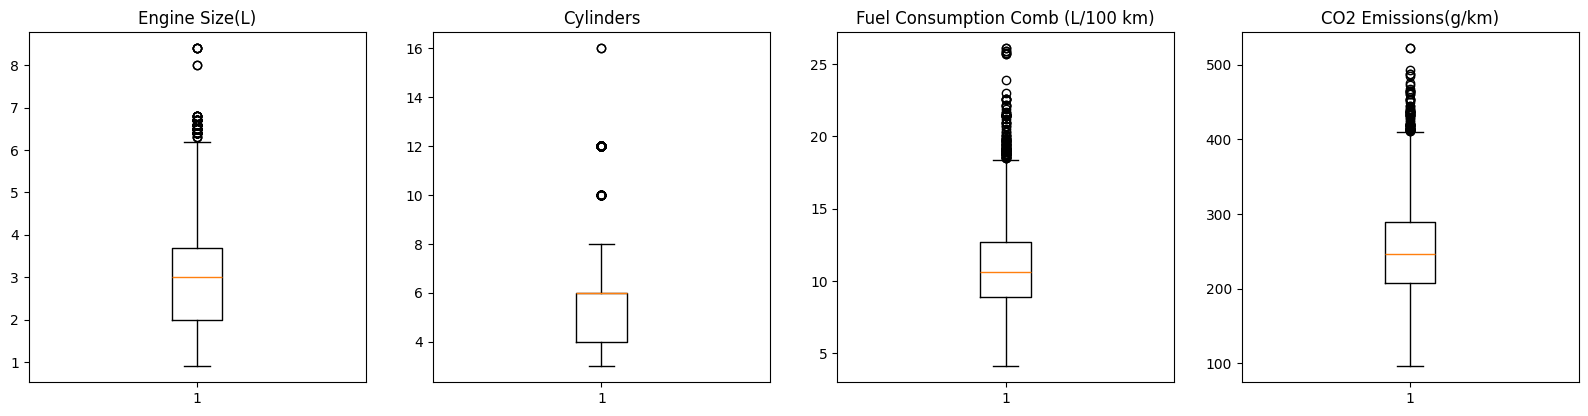

In [63]:
plt.figure(figsize = (20,10))
for i in enumerate(df_correlation):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_correlation[i[1]])

In [64]:
z = np.abs(stats.zscore(df_correlation))

In [65]:
#removing the outliers
df_new = df_correlation[(z < 1.9).all(axis=1)]

In [66]:
df_new.reset_index(drop=True, inplace=True)

In [67]:
df_new.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230


In [68]:
print("The length of the original : " , len(df))
print("The length after removing the outliers : " , len(df_new))
print("We just Removed",len(df)-len(df_new),"Outliers")

The length of the original :  6281
The length after removing the outliers :  5526
We just Removed 755 Outliers


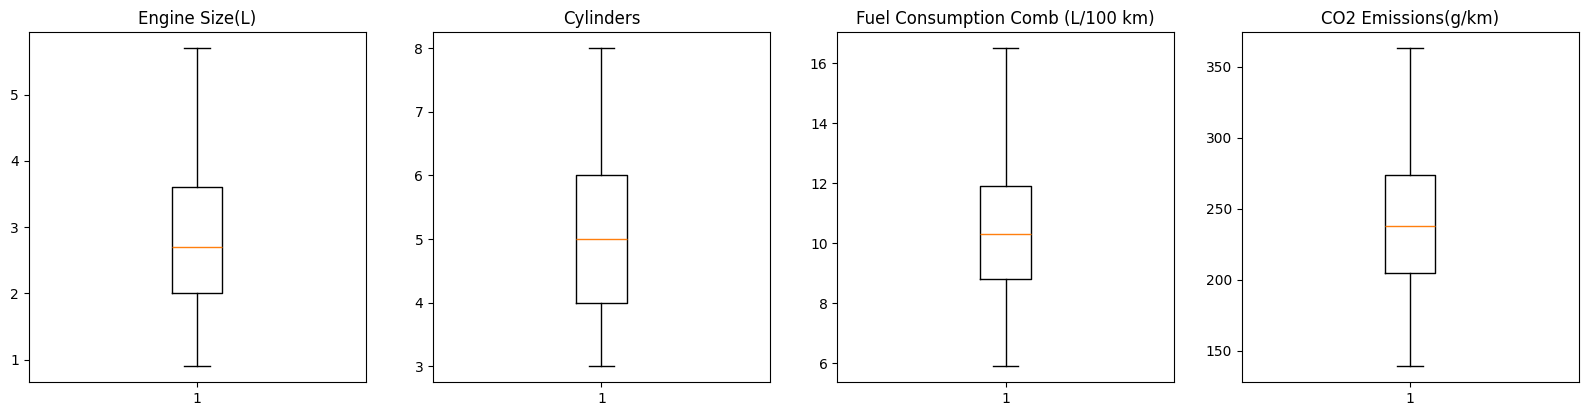

In [69]:
plt.figure(figsize = (20,10))
for i in enumerate(df_new):
    plt.subplot(2,4,i[0]+1)
    plt.title(i[1])
    plt.boxplot(df_new[i[1]])

In [70]:
# with outliers
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),6281.0,3.161742,1.365299,0.9,2.0,3.0,3.7,8.4
Cylinders,6281.0,5.618851,1.846391,3.0,4.0,6.0,6.0,16.0
Fuel Consumption Comb (L/100 km),6281.0,11.017609,2.947034,4.1,8.9,10.6,12.7,26.1
CO2 Emissions(g/km),6281.0,251.163827,59.293191,96.0,208.0,246.0,289.0,522.0


In [71]:
# without outliers
df_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine Size(L),5526.0,2.882410,1.081911,0.9,2.0,2.7,3.6,5.7
Cylinders,5526.0,5.267101,1.445715,3.0,4.0,5.0,6.0,8.0
Fuel Consumption Comb (L/100 km),5526.0,10.443015,2.115111,5.9,8.8,10.3,11.9,16.5
CO2 Emissions(g/km),5526.0,241.733261,46.901574,139.0,205.0,238.0,274.0,363.0


In [72]:
df_new.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230


### <font color='green'> Sample Frame </font>

In [73]:
sample_df=df_new.sample(n=200,random_state=35)
sample_df.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
3247,2.5,4,7.5,176
1234,2.4,4,9.4,216
108,4.4,8,13.8,317
3984,3.0,6,12.3,290
1359,2.4,4,10.7,246


In [74]:
indexs=sample_df.index
indexs

Index([3247, 1234,  108, 3984, 1359,  397, 5004, 2213,  313, 4458,
       ...
       1340, 3696, 3825, 3676, 2069,  421,  770,  506,  729,  511],
      dtype='int64', length=200)

In [75]:
# we have to drop the sample dataframes
for i in indexs:
    df_new.drop(i, axis = 0,inplace = True)

In [76]:
df_new.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,3.5,6,11.1,255
3,3.5,6,10.6,244
4,3.5,6,10.0,230


In [77]:
sample_df_Xtest=sample_df.drop(['CO2 Emissions(g/km)'],axis=1)
sample_df_ytest=sample_df["CO2 Emissions(g/km)"]

In [78]:
new=sample_df_Xtest.astype(np.float32)
sample_df_Xtest = (new - np.min(new)) / (np.max(new) - np.min(new))
sample_df_Xtest["Engine Size(L)"]=sample_df_Xtest["Engine Size(L)"].map(lambda x:round(x,2))
sample_df_Xtest["Cylinders"]=sample_df_Xtest["Cylinders"].map(lambda x:round(x,2))
sample_df_Xtest["Fuel Consumption Comb (L/100 km)"]=sample_df_Xtest["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))
sample_df_Xtest.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
3247,0.10,0.20,0.44
1234,0.09,0.20,0.56
108,0.23,0.47,0.86
3984,0.13,0.34,0.76
1359,0.09,0.20,0.65


### <font color='green'> Normalize </green>

In [79]:
X = df_new.drop(['CO2 Emissions(g/km)'], axis= 1).astype(np.float32)
y = df_new["CO2 Emissions(g/km)"].astype(np.float32)

In [80]:
# Normalize
X = (X - np.min(X)) / (np.max(X) - np.min(X))


In [81]:
X["Engine Size(L)"]=X["Engine Size(L)"].map(lambda x:round(x,2))
X["Cylinders"]=X["Cylinders"].map(lambda x:round(x,2))
X["Fuel Consumption Comb (L/100 km)"]=X["Fuel Consumption Comb (L/100 km)"].map(lambda x:round(x,2))

In [82]:
X.head()

,Engine Size(L),Cylinders,Fuel Consumption Comb (L/100 km)
0,0.07,0.20,0.49
1,0.10,0.20,0.56
2,0.17,0.33,0.65
3,0.17,0.33,0.62
4,0.17,0.33,0.58


In [83]:
y.head()

0    196.0
1    221.0
2    255.0
3    244.0
4    230.0
Name: CO2 Emissions(g/km), dtype: float32

In [84]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train", X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (4260, 3)
y_train (4260,)
X_test (1066, 3)
y_test (1066,)


# <font color='red'>Model Building</font>

In [85]:
# Importing some ML libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

### <font color='Green'>LR (Linear Regression)</font>

In [86]:
def train_linear_regression_model(X_train, y_train):
    model = LinearRegression().fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    lin_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, lin_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_Linear": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_Linear"] = result_pred["Pred_Linear"].round(2)
    result_pred["Diff"] = result_pred["Pred_Linear"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_linear_regression_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, lin_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {lin_r2_score}")
    linear_regression_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 14.242487782866279
Testing RMSE: 15.626458590039606
R^2 score on Training Data: 0.9078455946474839
Cross-validated R^2 score: 0.9074157761927866
Mean Difference: 9.6094


In [87]:
linear_regression_pred.head(20)

,Pred_Linear,Real_Value,Diff
0,188.59,176,12.59
1,220.73,216,4.73
2,326.53,317,9.53
3,285.99,290,-4.01
4,245.22,246,-0.78
5,193.64,184,9.64
6,255.41,250,5.41
7,320.45,311,9.45
8,192.48,179,13.48
9,349.63,263,86.63


### <font color='green'>RF (Random Forest)</font>

In [88]:
def train_random_forest_model(X_train, y_train):
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    rf_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, rf_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_RF": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
    result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_random_forest_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, rf_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {rf_r2_score}")
    random_forest_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 7.91453077120193
Testing RMSE: 9.897854536782162
R^2 score on Training Data: 0.9715426317550955
Cross-validated R^2 score: 0.9609195393796798
Mean Difference: 9.364799999999997


In [89]:
random_forest_pred.head(20)

,Pred_RF,Real_Value,Diff
0,181.73,176,5.73
1,225.81,216,9.81
2,332.60,317,15.60
3,297.86,290,7.86
4,259.58,246,13.58
5,193.16,184,9.16
6,255.02,250,5.02
7,322.52,311,11.52
8,189.00,179,10.00
9,270.50,263,7.50


### <font color='green'>SVR (Systemic Vascular Resistance)</font>

In [90]:
def train_svr_model(X_train, y_train):
    model = SVR()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    svr_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, svr_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_SVR": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_SVR"] = result_pred["Pred_SVR"].round(2)
    result_pred["Diff"] = result_pred["Pred_SVR"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_svr_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, svr_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {svr_r2_score}")
    svr_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 13.311951076806936
Testing RMSE: 14.945809158282136
R^2 score on Training Data: 0.9194940803260128
Cross-validated R^2 score: 0.9193471844978778
Mean Difference: 10.32505


In [91]:
svr_pred.head(20)

,Pred_SVR,Real_Value,Diff
0,182.36,176,6.36
1,224.32,216,8.32
2,328.14,317,11.14
3,296.26,290,6.26
4,257.14,246,11.14
5,191.46,184,7.46
6,254.57,250,4.57
7,320.99,311,9.99
8,188.10,179,9.10
9,328.88,263,65.88


### <font color='green'>KNN (k-nearest neighbors algorithm)</font>

In [92]:
def train_knn_model(X_train, y_train):
    model = KNeighborsRegressor()
    model.fit(X_train, y_train)
    return model

def evaluate_model(model, X_train, y_train, X_test, y_test):
    train_rmse = np.sqrt(mean_squared_error(y_train, model.predict(X_train)))
    test_rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
    r2_train = model.score(X_train, y_train)
    knn_r2_score = cross_val_score(model, X_train, y_train, cv=10, scoring="r2").mean()
    return train_rmse, test_rmse, r2_train, knn_r2_score

def predict_and_compare(model, sample_df_Xtest, sample_df_ytest):
    pred = model.predict(sample_df_Xtest)
    result_pred = pd.DataFrame({"Pred_KNN": pred, "Real_Value": sample_df_ytest.values})
    result_pred["Pred_KNN"] = result_pred["Pred_KNN"].map(lambda x:round(x,2))
    result_pred["Diff"] = result_pred["Pred_KNN"] - result_pred["Real_Value"]
    mean_diff = abs(result_pred["Diff"]).mean()
    return result_pred, mean_diff

if __name__ == "__main__":
    # Assuming X_train, y_train, X_test, y_test, sample_df_Xtest, and sample_df_ytest are defined
    model = train_knn_model(X_train, y_train)
    train_rmse, test_rmse, r2_train, knn_r2_score = evaluate_model(model, X_train, y_train, X_test, y_test)
    print(f"Training RMSE: {train_rmse}")
    print(f"Testing RMSE: {test_rmse}")
    print(f"R^2 score on Training Data: {r2_train}")
    print(f"Cross-validated R^2 score: {knn_r2_score}")
    knn_pred, mean_diff = predict_and_compare(model, sample_df_Xtest, sample_df_ytest)
    print(f"Mean Difference: {mean_diff}")

Training RMSE: 8.720998764038086
Testing RMSE: 10.629472732543945
R^2 score on Training Data: 0.965447704829792
Cross-validated R^2 score: 0.9560651146121446
Mean Difference: 9.123


In [93]:
knn_pred.head(20)

,Pred_KNN,Real_Value,Diff
0,180.8,176,4.8
1,227.4,216,11.4
2,330.6,317,13.6
3,297.8,290,7.8
4,258.2,246,12.2
5,192.0,184,8.0
6,254.4,250,4.4
7,319.8,311,8.8
8,187.6,179,8.6
9,271.8,263,8.8


## <font color='red'> Models R2 Score Comparison Table </font>

In [94]:
data = {"Model": ["Linear Regression", "Random Forest","SVR", "KNN"], "R2 Score": [lin_r2_score,rf_r2_score,svr_r2_score,knn_r2_score]}
df=pd.DataFrame(data)
df

,Model,R2 Score
0,Linear Regression,0.907416
1,Random Forest,0.960920
2,SVR,0.919347
3,KNN,0.956065


### <font color='green'>As you can see, we are getting more accuracy in our random forest model. So we are going to use the Random Forest model in our deployment.</font>.

# <font color='red'>Difference Table</font>

In [95]:
import plotly.graph_objects as go

In [96]:
results = pd.concat([linear_regression_pred['Real_Value'],linear_regression_pred['Pred_Linear'], knn_pred['Pred_KNN'], svr_pred['Pred_SVR'], random_forest_pred['Pred_RF']], axis=1,sort=False)
# Define the colors for the table
colors = ['lightpink', 'lightgreen', 'yellow', 'lightgreen', 'yellow']
# # Create the table using Plotly
fig = go.Figure(data=[go.Table(header=dict(values=['Values from our Data Seta', 'Linear Model Predicated Values','KNN Model Predicated Values','SVR Model Predicated Values','RF Model Predicated Values'], line_color='blacK', fill_color='LightSlateGray', align='center',font=dict(color='white', size=12)),
cells=dict( values=[results['Real_Value'],results['Pred_Linear'], results['Pred_KNN'], results['Pred_SVR'], results['Pred_RF'],], line_color=colors, fill_color=colors, align='center', font=dict(color='#660033', size=13)))])

In [97]:
fig.show()